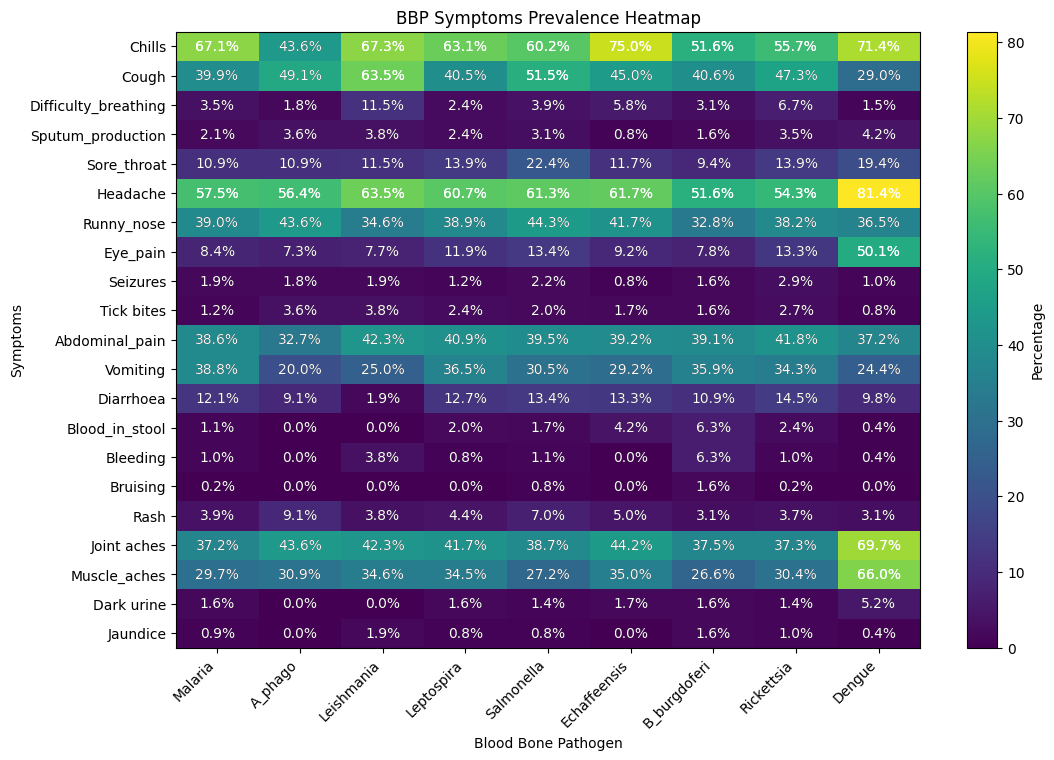

In [38]:

import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    'Symptoms': ['Chills', 'Cough', 'Difficulty_breathing', 'Sputum_production', 'Sore_throat', 'Headache', 'Runny_nose', 'Eye_pain', 'Seizures', 'Tick bites', 'Abdominal_pain', 'Vomiting', 'Diarrhoea', 'Blood_in_stool', 'Bleeding', 'Bruising', 'Rash', 'Joint aches', 'Muscle_aches', 'Dark urine', 'Jaundice'],
    'Malaria': [67.1, 39.9, 3.5, 2.1, 10.9, 57.5, 39.0, 8.4, 1.9, 1.2, 38.6, 38.8, 12.1, 1.1, 1.0, 0.2, 3.9, 37.2, 29.7, 1.6, 0.9],
    'A_phago': [43.6, 49.1, 1.8, 3.6, 10.9, 56.4, 43.6, 7.3, 1.8, 3.6, 32.7, 20.0, 9.1, 0.0, 0.0, 0.0, 9.1, 43.6, 30.9, 0.0, 0.0],
    'Leishmania': [67.3, 63.5, 11.5, 3.8, 11.5, 63.5, 34.6, 7.7, 1.9, 3.8, 42.3, 25.0, 1.9, 0.0, 3.8, 0.0, 3.8, 42.3, 34.6, 0.0, 1.9],
    'Leptospira': [63.1, 40.5, 2.4, 2.4, 13.9, 60.7, 38.9, 11.9, 1.2, 2.4, 40.9, 36.5, 12.7, 2.0, 0.8, 0.0, 4.4, 41.7, 34.5, 1.6, 0.8],
    'Salmonella': [60.2, 51.5, 3.9, 3.1, 22.4, 61.3, 44.3, 13.4, 2.2, 2.0, 39.5, 30.5, 13.4, 1.7, 1.1, 0.8, 7.0, 38.7, 27.2, 1.4, 0.8],
    'Echaffeensis': [75.0, 45.0, 5.8, 0.8, 11.7, 61.7, 41.7, 9.2, 0.8, 1.7, 39.2, 29.2, 13.3, 4.2, 0.0, 0.0, 5.0, 44.2, 35.0, 1.7, 0.0],
    'B_burgdoferi': [51.6, 40.6, 3.1, 1.6, 9.4, 51.6, 32.8, 7.8, 1.6, 1.6, 39.1, 35.9, 10.9, 6.3, 6.3, 1.6, 3.1, 37.5, 26.6, 1.6, 1.6],
    'Rickettsia': [55.7, 47.3, 6.7, 3.5, 13.9, 54.3, 38.2, 13.3, 2.9, 2.7, 41.8, 34.3, 14.5, 2.4, 1.0, 0.2, 3.7, 37.3, 30.4, 1.4, 1.0],
    'Dengue': [71.4, 29.0, 1.5, 4.2, 19.4, 81.4, 36.5, 50.1, 1.0, 0.8, 37.2, 24.4, 9.8, 0.4, 0.4, 0.0, 3.1, 69.7, 66.0, 5.2, 0.4]}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the 'Symptoms' column as the index
df.set_index('Symptoms', inplace=True)

# Create the heatmap
plt.figure(figsize=(12, 8))
heatmap = plt.imshow(df, cmap='viridis', aspect='auto', interpolation='nearest')

# Annotate each cell with its respective value
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        plt.text(j, i, f'{df.iloc[i, j]:.1f}%', ha='center', va='center', color='white' if df.iloc[i, j] > 50 else 'black')

# Set the x-axis ticks and labels
plt.xticks(range(len(df.columns)), df.columns, rotation=45, ha='right')

# Set the y-axis ticks and labels
plt.yticks(range(len(df.index)), df.index)

# Display the colorbar
plt.colorbar(label='Percentage')

# Add percentage values in white text
for i in range(len(df.index)):
    for j in range(len(df.columns)):
        plt.text(j, i, f'{df.iloc[i, j]:.1f}%', color='white', ha='center', va='center')

# Set the plot title and labels
plt.title('BBP Symptoms Prevalence Heatmap')
plt.xlabel('Blood Bone Pathogen')
plt.ylabel('Symptoms Prevalence')

# Show the plot
plt.show()


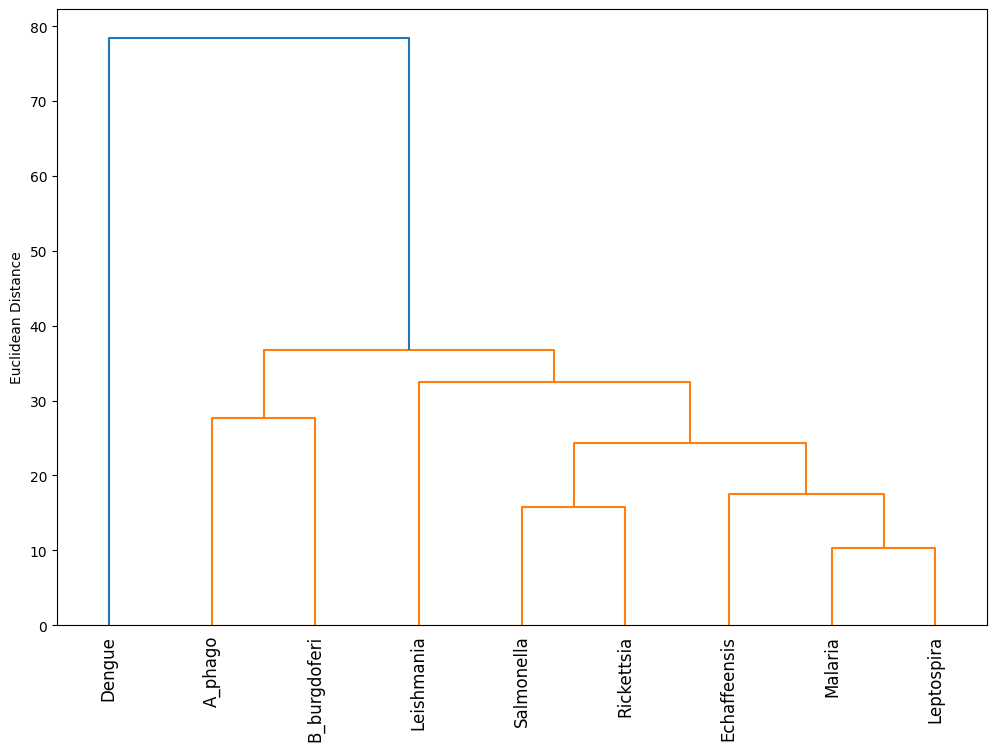

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

# Data
data = {
    'Symptoms': ['Chills', 'Cough', 'Difficulty_breathing', 'Sputum_production', 'Sore_throat', 'Headache', 'Runny_nose', 'Eye_pain', 'Seizures', 'Tick bites', 'Abdominal_pain', 'Vomiting', 'Diarrhoea', 'Blood_in_stool', 'Bleeding', 'Bruising', 'Rash', 'Joint aches', 'Muscle_aches', 'Dark urine', 'Jaundice'],
    'Malaria': [67.1, 39.9, 3.5, 2.1, 10.9, 57.5, 39.0, 8.4, 1.9, 1.2, 38.6, 38.8, 12.1, 1.1, 1.0, 0.2, 3.9, 37.2, 29.7, 1.6, 0.9],
    'A_phago': [43.6, 49.1, 1.8, 3.6, 10.9, 56.4, 43.6, 7.3, 1.8, 3.6, 32.7, 20.0, 9.1, 0.0, 0.0, 0.0, 9.1, 43.6, 30.9, 0.0, 0.0],
    'Leishmania': [67.3, 63.5, 11.5, 3.8, 11.5, 63.5, 34.6, 7.7, 1.9, 3.8, 42.3, 25.0, 1.9, 0.0, 3.8, 0.0, 3.8, 42.3, 34.6, 0.0, 1.9],
    'Leptospira': [63.1, 40.5, 2.4, 2.4, 13.9, 60.7, 38.9, 11.9, 1.2, 2.4, 40.9, 36.5, 12.7, 2.0, 0.8, 0.0, 4.4, 41.7, 34.5, 1.6, 0.8],
    'Salmonella': [60.2, 51.5, 3.9, 3.1, 22.4, 61.3, 44.3, 13.4, 2.2, 2.0, 39.5, 30.5, 13.4, 1.7, 1.1, 0.8, 7.0, 38.7, 27.2, 1.4, 0.8],
    'Echaffeensis': [75.0, 45.0, 5.8, 0.8, 11.7, 61.7, 41.7, 9.2, 0.8, 1.7, 39.2, 29.2, 13.3, 4.2, 0.0, 0.0, 5.0, 44.2, 35.0, 1.7, 0.0],
    'B_burgdoferi': [51.6, 40.6, 3.1, 1.6, 9.4, 51.6, 32.8, 7.8, 1.6, 1.6, 39.1, 35.9, 10.9, 6.3, 6.3, 1.6, 3.1, 37.5, 26.6, 1.6, 1.6],
    'Rickettsia': [55.7, 47.3, 6.7, 3.5, 13.9, 54.3, 38.2, 13.3, 2.9, 2.7, 41.8, 34.3, 14.5, 2.4, 1.0, 0.2, 3.7, 37.3, 30.4, 1.4, 1.0],
    'Dengue': [71.4, 29.0, 1.5, 4.2, 19.4, 81.4, 36.5, 50.1, 1.0, 0.8, 37.2, 24.4, 9.8, 0.4, 0.4, 0.0, 3.1, 69.7, 66.0, 5.2, 0.4]}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Set the 'Symptoms' column as the index
df.set_index('Symptoms', inplace=True)

# Perform hierarchical clustering
linkage_matrix = linkage(df.transpose(), method='complete', metric='euclidean')

# Create the heatmap
plt.figure(figsize=(12, 8))

# Plot the dendrogram for the columns (pathogens)
dendrogram(linkage_matrix, labels=df.columns, leaf_rotation=90)

# Set the y-axis label
plt.ylabel('Euclidean Distance')

# Show the plot
plt.show()

